<h1><center><font color='blue'>Regresión Lineal 1D: Entrenando 1 parámetro</h1></center></font>


<h2>Objetivo</h2><ul><li> Crear una función de costo o criterio usando MSE (Mean Square Error).</li></ul> 


<h2>Tabla de contenido</h2>
<p>Entrenaremos un modelo con PyTorch usando datos que se crearán. El modelo solo tiene 1 parámetro: la pendiente.</p>

<ul>
    <li><a href="#Makeup_Data">Crear algunos datos</a></li>
    <li><a href="#Model_Cost">Crear el modelo y la función de costo (Pérdida Total)</a></li>
    <li><a href="#Train">Entrenar el modelo</a></li>
</ul>

<hr>


<h2>Preparación</h2>


In [19]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [20]:
# These are the libraries will be used for this lab.

import numpy as np
import matplotlib.pyplot as plt

La clase plot_diagram nos ayuda a visualizar el espacio de datos y el de parámetros durante el entrenamiento; no tiene nada que ver con PyTorch.


In [21]:
# Clase para graficar

class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Ejecutor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

<!--Empty Space for separating topics-->


<h2 id="Makeup_Data">Crear algunos datos</h2>


In [22]:
# Import the library PyTorch

import torch

Generamos valores entre -3 y 3 para luego crear una recta con pendiente -3. Esta es la recta que se estimará.


In [23]:
# Create the f(X) with a slope of -3

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

Grafiquemos:


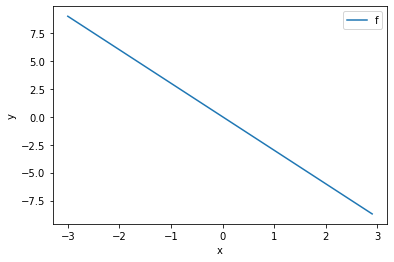

In [24]:
# Plot the line with blue

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Agreguemos ruido a los datos para simular datos reales. <code>torch.randn(X.size())</code> genera ruido gaussiano del mismo tamaño que X y con una desviación estándar de 0.1.


In [25]:
# Add some noise to f(X) and save it in Y

Y = f + 0.1 * torch.randn(X.size())

Graficamos <code>Y</code>: 


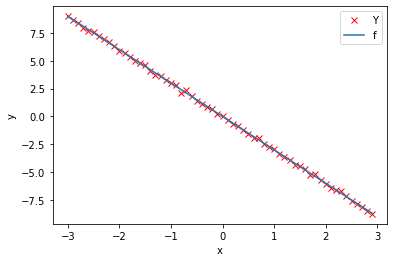

In [26]:
# Plot the data points

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'Y')

plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<!--Empty Space for separating topics-->


<h2 id="Model_Cost">Creamos el modelo y la función de costo (Total Loss)</h2>


Crearemos el modelo y la función de costo que vamos a utilizar para entrenar el modelo y evaluar los resultados.


Primero, definimos la función <code>forward</code>  $y=w*x$. (le agregaremos el sesgo en el próximo lab)


In [27]:
# Create forward function for prediction

def forward(x):
    return w * x

Definimos la función de costo usando MSE (Mean Square Error): 


In [28]:
# Create the MSE function for evaluate the result.

def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

Definimos la tasa de aprendizaje <code>lr</code> y una lista vacía LOSS para registrar las pérdidas para cada iteración:   


In [29]:
# Create Learning Rate and an empty list to record the loss for each iteration

lr = 0.1
LOSS = []

Creamos un parámetro de modelo estableciendo el argumento <code>requires_grad</code> en True, ya que el sistema debe aprenderlo.


In [30]:
w = torch.tensor(-10.0, requires_grad = True)

Creamos un objeto <code>plot_diagram</code> para visualizar el espacio de datos y el espacio de parámetros para cada iteración durante el entrenamiento:



In [31]:
gradient_plot = plot_diagram(X, Y, w, stop = 5)

<!--Empty Space for separating topics-->


<h2 id="Train">Entrenando el modelo</h2>


Definamos una función para entrenar el modelo.


In [32]:
# Definimos una fucnión para entrenar el modelo

def train_model(iter):
    for epoch in range (iter):
        
        # realiza la predicción
        Yhat = forward(X)
        
        # calcula la iteración
        loss = criterion(Yhat,Y)
        
        # imprime el diagrama
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # almacena la pérdida en una lista
        LOSS.append(loss.item())
        
        # backward pass: computa el gradiente de la pérdida respecto a todos los parámetros aprendibles
        loss.backward()
        
        # actualiza los parámetros
        w.data = w.data - lr * w.grad.data
        
        # cero los gradientes antes de ejecutar la pasada hacia atrás
        w.grad.data.zero_()

Intentemos correr 4 iteraciones del descenso del gradiente:


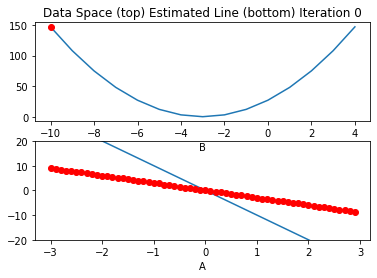

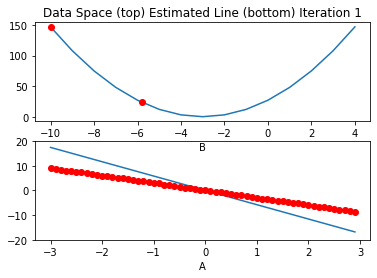

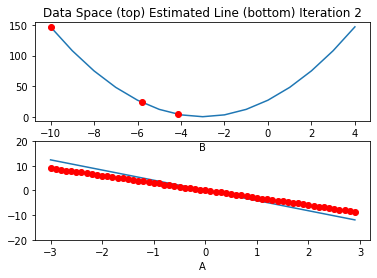

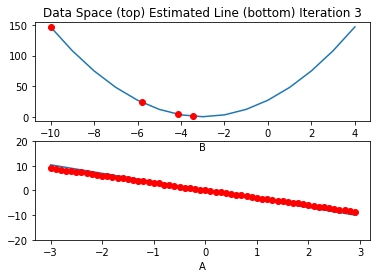

<Figure size 432x288 with 0 Axes>

In [33]:
# Give 4 iterations for training the model here.

train_model(4)

Graficamos el costo para cada iteración: 


Text(23.875, 0.5, 'Cost')

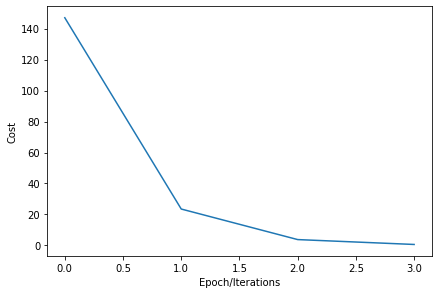

In [34]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

<!--Empty Space for separating topics-->


<h3>Práctica</h3>


Crear un nuevo parámetro aprendible w con valor de -15.0


In [35]:
# Practice: Create w with the inital value of -15.0

w = torch.tensor(-15.0, requires_grad=True)

<!--Empty Space for separating topics-->


Crear una lista vacía <code>LOSS2</code>:


In [36]:
# Practice: Create LOSS2 list

LOSS2 = []

<!--Empty Space for separating topics-->


Escriba su propia función <code> my_train_model </code> con la lista de pérdidas <code> LOSS2 </code>. Y ejecútelo con 4 iteraciones.


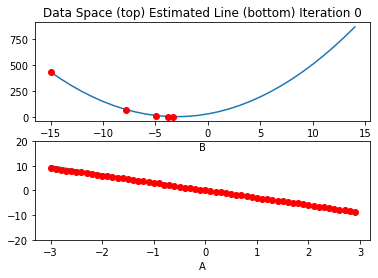

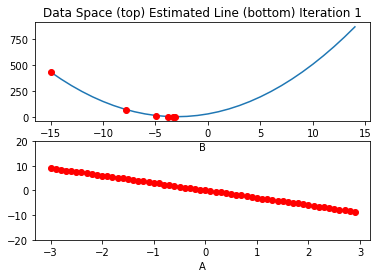

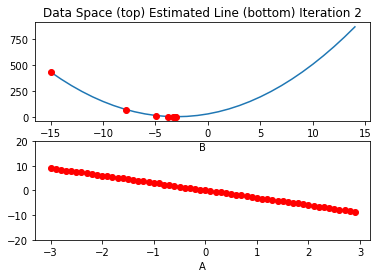

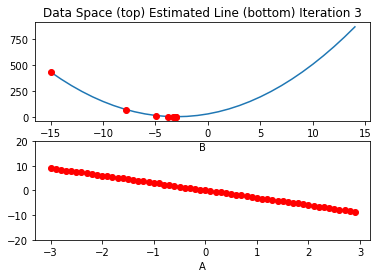

<Figure size 432x288 with 0 Axes>

In [38]:
# Practice: Create your own my_train_model

#gradient_plot1 = plot_diagram(X, Y, w, stop = 15)
def my_train_model(iter):
    for epoch in range (iter):
        Yhat = forward(X)
        loss = criterion(Yhat,Y)
        gradient_plot1(Yhat, w, loss.item(), epoch)
        LOSS2.append(loss)
        loss.backward()
        w.data = w.data - lr * w.grad.data
        w.grad.data.zero_()
my_train_model(4)

<!--Empty Space for separating topics-->


Grafique una superposición (overlay) de <code>LOSS2</code> y <code>LOSS</code>. 


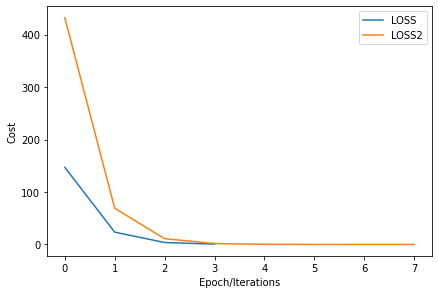

In [39]:
# Practice: Plot the list LOSS2 and LOSS

plt.plot(LOSS, label = "LOSS")
plt.plot(LOSS2, label = "LOSS2")
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
plt.legend()

<!--Empty Space for separating topics-->


Qué le dice esto del valor del parámetro?


Que es sensible a la inicialización.